In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv('D:\\3RD YEAR\\6th sem\\PBL\\Research paper implementation\\Electric-Car-Sales-by-Model-in-USA.csv')
df.head()

,Make,Model,Logo,janv-12,Feb-12,mars-12,Apr-12,May-12,juin-12,juil-12,...,mars-19,Apr-19,May-19,juin-19,juil-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
0,Chevrolet,Volt,https://www.carlogos.org/logo/Chevrolet-logo-2...,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,...,146667.0,147072.0,147481.0,147813.0,148063.0,148337.0,148687.0,148757.0,148907.0,149057
1,Toyota,Prius PHV,https://www.carlogos.org/logo/Toyota-logo-1989...,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,...,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345
2,Nissan,Leaf,https://www.carlogos.org/logo/Nissan-logo-2013...,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,...,122534.0,123485.0,124701.0,125857.0,126795.0,127912.0,128960.0,129847.0,130987.0,132214
3,Tesla,Model S,https://www.carlogos.org/logo/Tesla-logo-2003-...,0.0,NaN,NaN,NaN,NaN,12.0,31.0,...,147517.0,148342.0,149367.0,151117.0,152092.0,153142.0,154242.0,154992.0,156492.0,157992
4,Ford,C-Max Energi,https://www.carlogos.org/logo/Ford-logo-2003-1...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231


In [22]:
df.fillna(0, inplace=True)
df.head()

,Make,Model,Logo,janv-12,Feb-12,mars-12,Apr-12,May-12,juin-12,juil-12,...,mars-19,Apr-19,May-19,juin-19,juil-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
0,Chevrolet,Volt,https://www.carlogos.org/logo/Chevrolet-logo-2...,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,...,146667.0,147072.0,147481.0,147813.0,148063.0,148337.0,148687.0,148757.0,148907.0,149057
1,Toyota,Prius PHV,https://www.carlogos.org/logo/Toyota-logo-1989...,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,...,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345
2,Nissan,Leaf,https://www.carlogos.org/logo/Nissan-logo-2013...,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,...,122534.0,123485.0,124701.0,125857.0,126795.0,127912.0,128960.0,129847.0,130987.0,132214
3,Tesla,Model S,https://www.carlogos.org/logo/Tesla-logo-2003-...,0.0,0.0,0.0,0.0,0.0,12.0,31.0,...,147517.0,148342.0,149367.0,151117.0,152092.0,153142.0,154242.0,154992.0,156492.0,157992
4,Ford,C-Max Energi,https://www.carlogos.org/logo/Ford-logo-2003-1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231


In [23]:
def correct_month(dt):
    dt = dt.replace(' ', '-')
    m, y = dt.split('-')
    month_corrections = {'janv': 'jan', 'fev': 'feb', 'mars': 'mar', 'avr': 'apr', 'mai': 'may', 'juin': 'jun', 'juil': 'jul', 'aout': 'aug', 'sept': 'sep', 'oct': 'oct', 'nov': 'nov', 'dec': 'dec'}
    m = m.lower()
    if m in month_corrections:
        m = month_corrections[m]
    if len(y) == 2:
        y = '20' + y
    return f'{m.lower()}-{y}'

corrected_columns = [correct_month(col) if '-' in col or ' ' in col else col for col in df.columns]

df.columns = corrected_columns
# print(df.columns.tolist())
corrected_columns

['Make',
 'Model',
 'Logo',
 'jan-2012',
 'feb-2012',
 'mar-2012',
 'apr-2012',
 'may-2012',
 'jun-2012',
 'jul-2012',
 'aug-2012',
 'sep-2012',
 'oct-2012',
 'nov-2012',
 'dec-2012',
 'jan-2013',
 'feb-2013',
 'mar-2013',
 'apr-2013',
 'may-2013',
 'jun-2013',
 'jul-2013',
 'aug-2013',
 'sep-2013',
 'oct-2013',
 'nov-2013',
 'dec-2013',
 'jan-2014',
 'feb-2014',
 'mar-2014',
 'apr-2014',
 'may-2014',
 'jun-2014',
 'jul-2014',
 'aug-2014',
 'sep-2014',
 'oct-2014',
 'nov-2014',
 'dec-2014',
 'jan-2015',
 'feb-2015',
 'mar-2015',
 'apr-2015',
 'may-2015',
 'jun-2015',
 'jul-2015',
 'aug-2015',
 'sep-2015',
 'oct-2015',
 'nov-2015',
 'dec-2015',
 'jan-2016',
 'feb-2016',
 'mar-2016',
 'apr-2016',
 'may-2016',
 'jun-2016',
 'jul-2016',
 'aug-2016',
 'sep-2016',
 'oct-2016',
 'nov-2016',
 'dec-2016',
 'jan-2017',
 'feb-2017',
 'mar-2017',
 'apr-2017',
 'may-2017',
 'jun-2017',
 'jul-2017',
 'aug-2017',
 'sep-2017',
 'oct-2017',
 'nov-2017',
 'dec-2017',
 'jan-2018',
 'feb-2018',
 'mar-2018

In [24]:
rows_to_drop = []

for index, row in df.iterrows():
    if (row.value_counts() > 80).any():
        rows_to_drop.append(index)

# df.drop(rows_to_drop, inplace=True)
print(rows_to_drop)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(df.iloc[0].value_counts())



[50, 52, 53, 54, 55, 56]


In [25]:
print(df.iloc[34,96])

4544.0


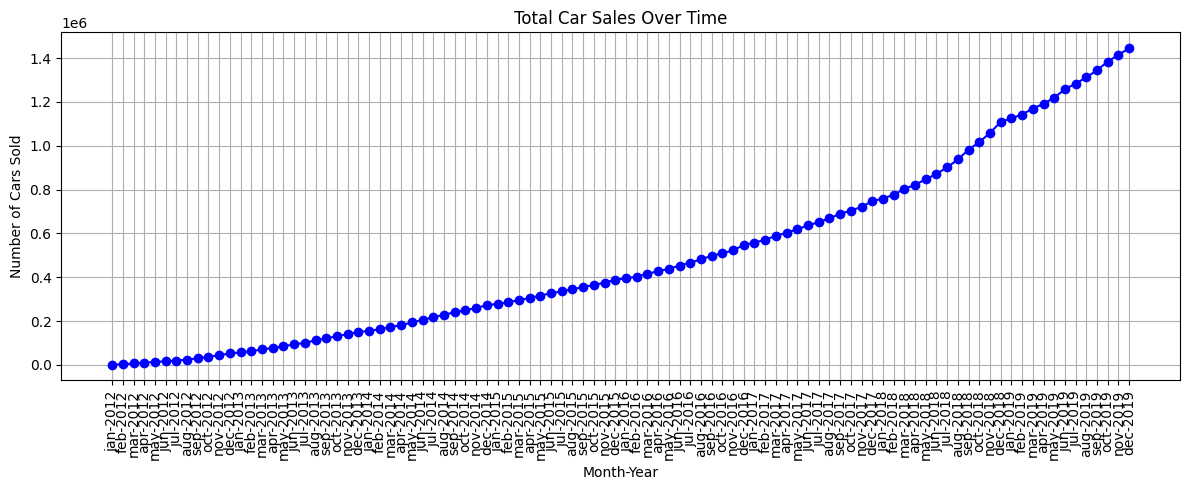

In [26]:
date_columns = df.columns[3:]
for col in df.columns[3:]:
    # df[col] = df[col].astype(str).str.replace("â€¬", "", regex=False)
    df[col] = df[col].astype(str).str.replace(",", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

monthly_sales = df[date_columns].sum()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(monthly_sales)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(df[date_columns[-7]])


plt.figure(figsize=(12, 5))
plt.plot(date_columns, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Total Car Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout() 
plt.show()

In [27]:
print(max(monthly_sales))


1444943.0


c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


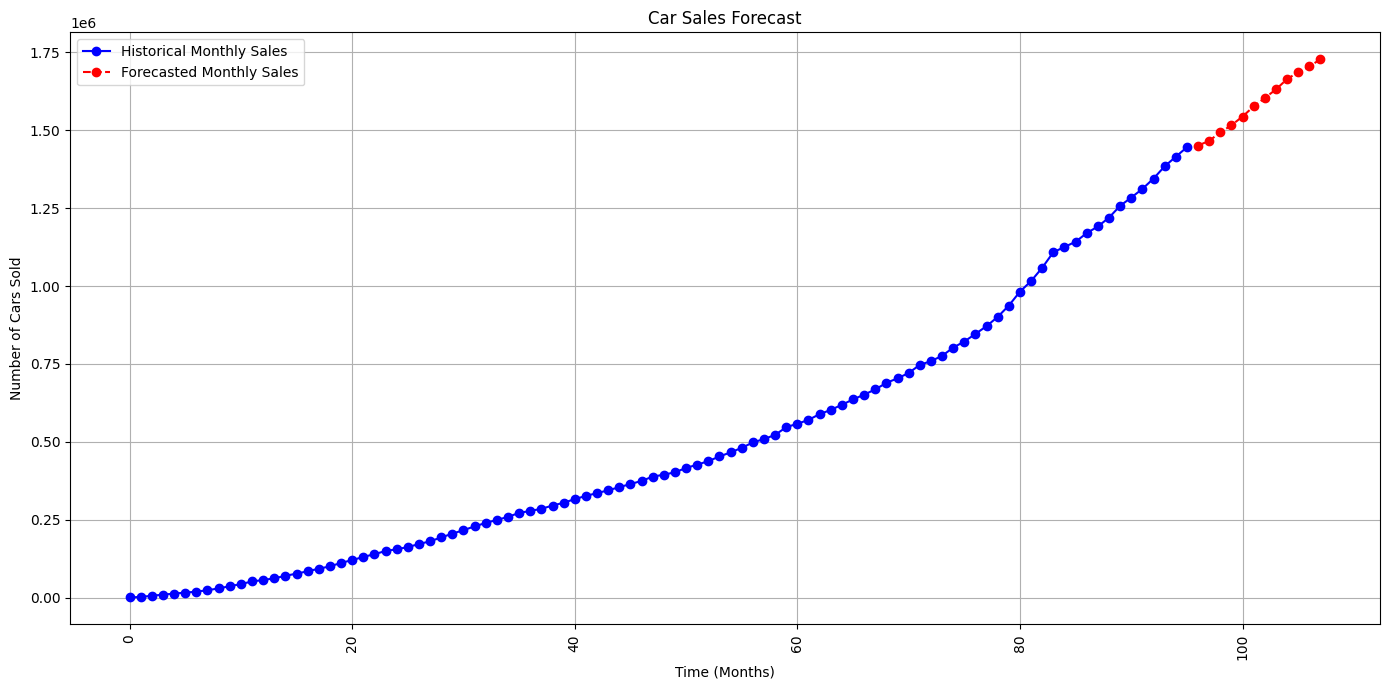

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sales_series = pd.Series(monthly_sales.values)

model = ARIMA(sales_series, order=(20, 1, 10))
model_fit = model.fit()

forecast_steps = 12  
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(14, 7))
plt.plot(sales_series.index, sales_series, marker='o', color='blue', label='Historical Monthly Sales')
forecast_index = np.arange(len(sales_series), len(sales_series) + forecast_steps)
plt.plot(forecast_index, forecast, marker='o', color='red', linestyle='--', label='Forecasted Monthly Sales')
plt.title('Car Sales Forecast')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

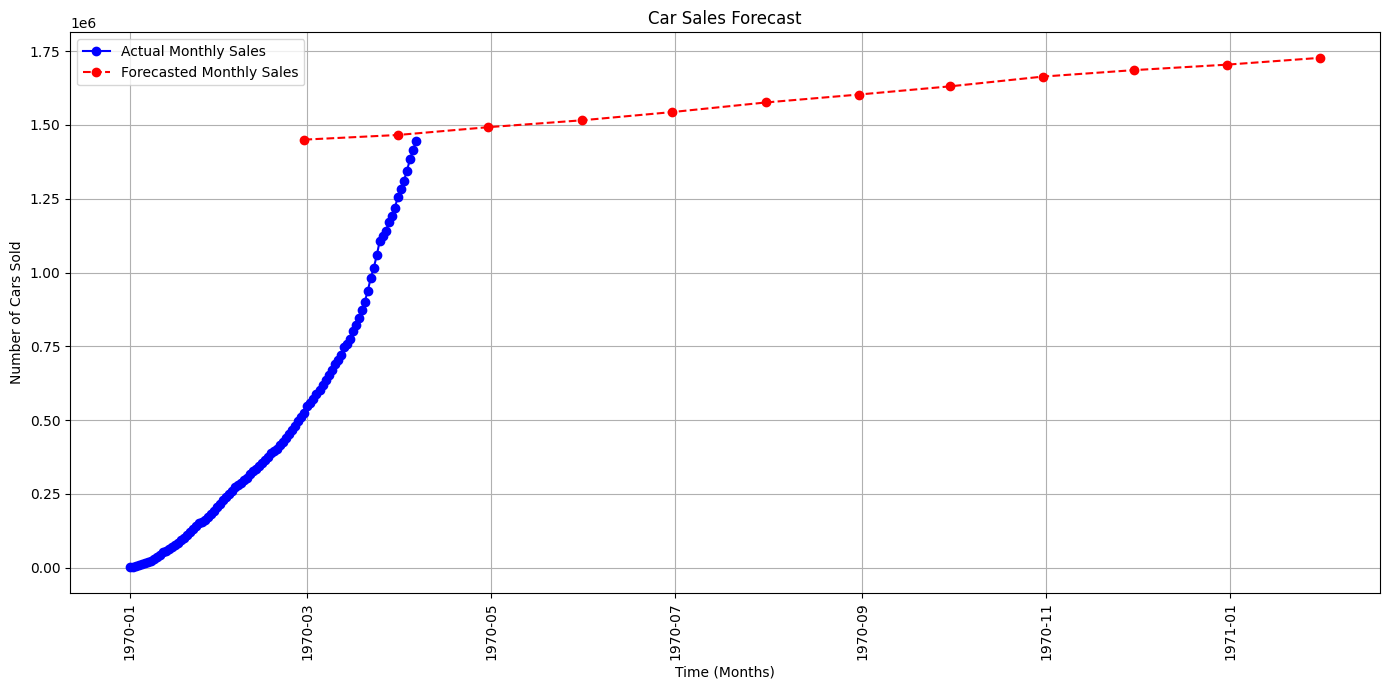

In [42]:
plt.figure(figsize=(14, 7))

# Plot actual sales data
plt.plot(sales_series.index, sales_series, marker='o', color='blue', label='Actual Monthly Sales')

# Plot forecasted sales data
forecast_index = pd.date_range(start=sales_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]  # Generate dates for forecasted period
plt.plot(forecast_index, forecast, marker='o', color='red', linestyle='--', label='Forecasted Monthly Sales')

plt.title('Car Sales Forecast')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
forecast_series

NameError: name 'forecast_series' is not defined

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(sales_series[-forecast_steps:], forecast))
print('ARIMA RMSE: %.3f' % rmse_arima)

# Define the function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    
    # Replace NaN values with 0 (when true values are 0)
    absolute_percentage_error[np.isnan(absolute_percentage_error)] = 0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_percentage_error) * 100
    return mape


# Calculate MAPE
mape_arima = mean_absolute_percentage_error(sales_series[-forecast_steps:], forecast)
print('ARIMA MAPE: %.3f' % mape_arima)

# Calculate R-squared
r_squared_arima = r2_score(sales_series[-forecast_steps:], forecast)
print('ARIMA R-squared: %.3f' % r_squared_arima)


ARIMA RMSE: 377774.202
ARIMA MAPE: 0.000
ARIMA R-squared: -12.367


In [33]:
historical_df = pd.DataFrame({
    'Month-Year': date_columns,
    'Historical Sales': monthly_sales.values.round(0).astype(int)  
})

print(historical_df.tail(12))  

   Month-Year  Historical Sales
84   jan-2019           1125103
85   feb-2019           1141994
86   mar-2019           1169633
87   apr-2019           1190888
88   may-2019           1219275
89   jun-2019           1257092
90   jul-2019           1283662
91   aug-2019           1311327
92   sep-2019           1344455
93   oct-2019           1383630
94   nov-2019           1414527
95   dec-2019           1444943
